# Bike share dataset

![Bikeshare photo](https://d21xlh2maitm24.cloudfront.net/wdc/CaBi-return2.jpg?mtime=20170103131208)

## Introducción
En la presente libreta de Jupyter se realiza un análisis de datos acerca de ciertas condiciones que pueden influir en la cantidad de bicicletas propiedad de la compañía **Capital Bikeshare** que son rentadas por usuarios.

### Objetivos
* Representar de manera visual la relación que existe entre la cantidad de bicicletas rentadas y las diferentes condiciones climáticas, día, mes, estación del año, entre otras.
* Determinar si existe correlación entre las condiciones climáticas y la cantidad de bicicletas rentadas.
* Tratar de predecir cuántas bicicletas serán rentadas para determinado día del año.
* Tratar de predecir cuántos usuarios casuales y cuántos registrados rentarán una bicicleta para determinado día del año.

### Acerca de

Para obtener más detalles del Data Set consulte la [descripción de los datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset).

Para saber más acerca de la compañía de renta de bicicletas que proporcionó los datos, puede consultar la página de [Capital Bikeshare](https://www.capitalbikeshare.com/).

------------------------------------------


En la siguiente celda se importan las librerías que serán utilizadas.

In [112]:
import requests
from zipfile import ZipFile
import os.path
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


A continuación se baja el conjunto de datos desde el repositorio de la **UCI**, se extrae el archivo zip y se leen los archivos en un dataframe de _pandas_.
El archivo days.csv representa en cada registro los datos de un día determinado; mientras que el archivo hour.csv representa en cada registro los datos de una hora determinada.
Ambos archivos comprenden la misma ventada de tiempo de dos años.

In [113]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip"
req = requests.get(url)
file_name = "Bike-Sharing-Dataset.zip"

if not os.path.isfile("./" + file_name):
    with open(file_name, "wb") as my_file:
        my_file.write(req.content)

    with ZipFile(file_name) as my_zip:
        my_zip.printdir()
        my_zip.extractall()
        
        
bikes_day = pd.read_csv("day.csv", index_col=0)
bikes_hour = pd.read_csv("hour.csv", index_col=0)

Empezamos por ver qué forma tiene el dataset days.csv.

In [114]:
print("Dimensiones del dataset bikes_day:", bikes_day.shape)
bikes_day.head()

Dimensiones del dataset bikes_day: (731, 15)


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Se crea una copia del dataframe bikes_day para reemplazar los valores númericos por sus correspondientes cadenas en las columnas que representan datos cualitativos. Esto se hace para que en las gráficas, las etiquetas sean cadenas y no números. <br>Cabe mencionar que el dataframe original no es modificado por esta operación.


In [115]:
bikes_day_copy = bikes_day.copy()
bikes_day_copy['weathersit'] = bikes_day['weathersit'].replace([1,2,3,4], 
["Despejado", "Neblina", "Poca lluvia/nieve", "Fuerte lluvia/nieve"])
bikes_day_copy['workingday'] = bikes_day['workingday'].replace([0,1], ["Inhábil", "Hábil"])
bikes_day_copy['weekday'] = bikes_day['weekday'].replace([0,1,2,3,4,5,6], 
["Domingo", "Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado"])
bikes_day_copy['holiday'] = bikes_day['holiday'].replace([0,1], ["No Festivo", "Festivo"])
bikes_day_copy['mnth'] = bikes_day['mnth'].replace([i for i in range(1,13)], 
["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", 
 "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"])
bikes_day_copy['yr'] = bikes_day['yr'].replace([0,1], [2011, 2012])
bikes_day_copy['season'] = bikes_day['season'].replace([1,2,3,4], 
["Invierno", "Primavera", "Verano", "Otoño"])

A continuación se presenta un conjunto de gráficas de barras en donde se relacionan algunos atributos cualitativos con la cantidad de bicicletas rentadas.

Text(0.5, 0, 'Condición climática')

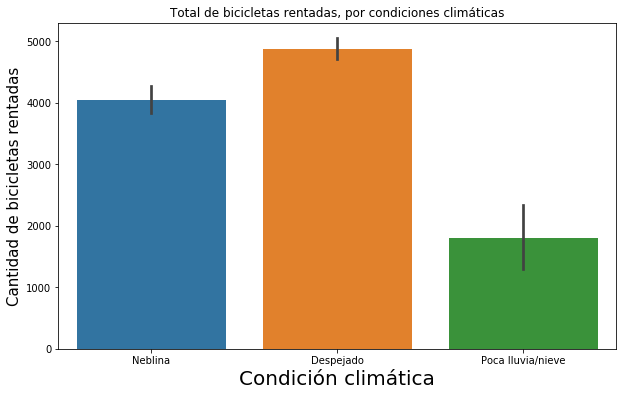

In [116]:
plt.figure(figsize=(10,6))
plt.title('Total de bicicletas rentadas, por condiciones climáticas')
#sns.barplot(x=estado_tiempo, y=bikes_day_2['cnt'])
sns.barplot(x=bikes_day_copy['weathersit'], y=bikes_day_copy['cnt'])
plt.ylabel('Cantidad de bicicletas rentadas', fontsize=15)
plt.xlabel('Condición climática', fontsize=20)

Text(0.5, 0, 'Estación del año')

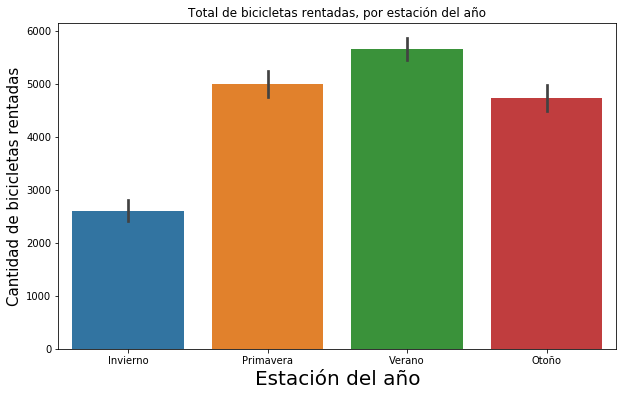

In [117]:
plt.figure(figsize=(10,6))
plt.title('Total de bicicletas rentadas, por estación del año')
sns.barplot(x=bikes_day_copy['season'], y=bikes_day_copy['cnt'])
plt.ylabel('Cantidad de bicicletas rentadas', fontsize=15)
plt.xlabel('Estación del año', fontsize=20)

Text(0.5, 0, 'Mes del año')

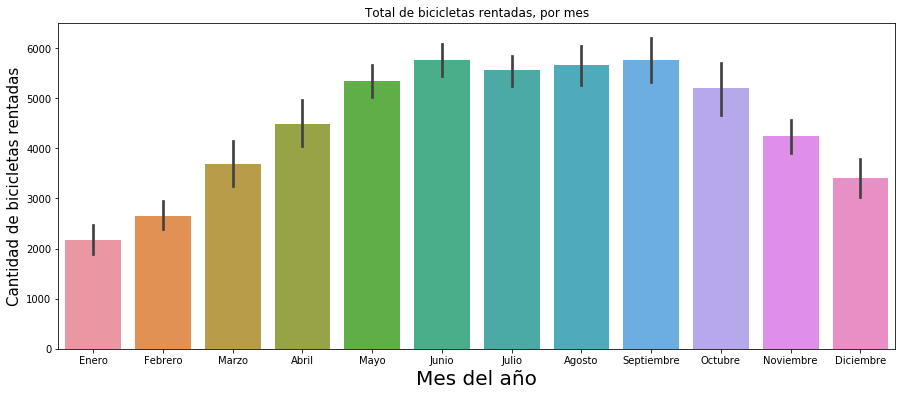

In [118]:
plt.figure(figsize=(15,6))
plt.title('Total de bicicletas rentadas, por mes')
sns.barplot(x=bikes_day_copy['mnth'], y=bikes_day_copy['cnt'])
plt.ylabel('Cantidad de bicicletas rentadas', fontsize=15)
plt.xlabel('Mes del año', fontsize=20)

Text(0.5, 0, 'Día de la semana')

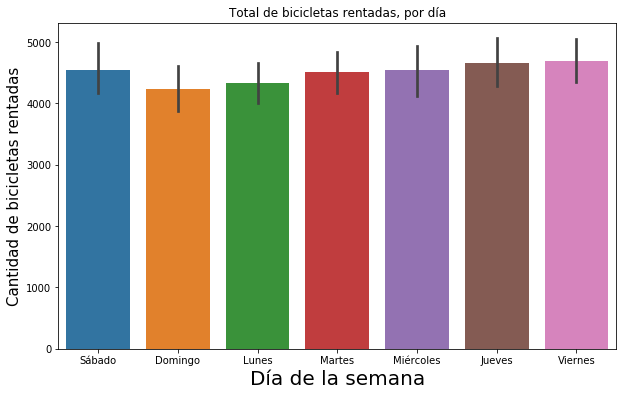

In [119]:
plt.figure(figsize=(10,6))
plt.title('Total de bicicletas rentadas, por día')
sns.barplot(x=bikes_day_copy['weekday'], y=bikes_day_copy['cnt'])
plt.ylabel('Cantidad de bicicletas rentadas', fontsize=15)
plt.xlabel('Día de la semana', fontsize=20)

Text(0.5, 0, 'Tipo de día')

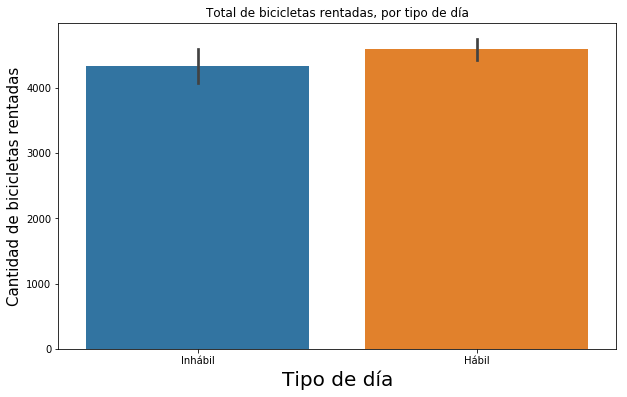

In [120]:
plt.figure(figsize=(10,6))
plt.title('Total de bicicletas rentadas, por tipo de día')
sns.barplot(x=bikes_day_copy['workingday'], y=bikes_day_copy['cnt'])
plt.ylabel('Cantidad de bicicletas rentadas', fontsize=15)
plt.xlabel('Tipo de día', fontsize=20)

Text(0.5, 0, 'Tipo de día')

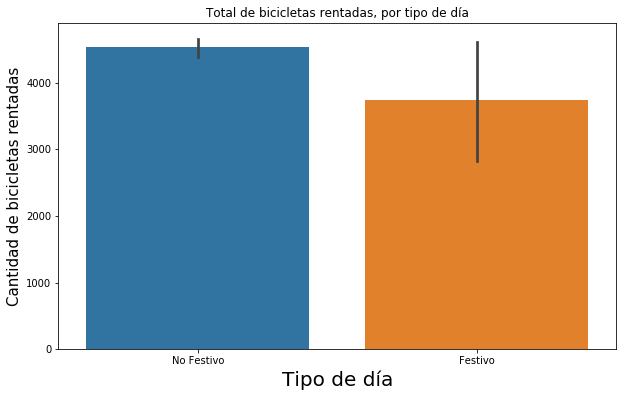

In [121]:
plt.figure(figsize=(10,6))
plt.title('Total de bicicletas rentadas, por tipo de día')
sns.barplot(x=bikes_day_copy['holiday'], y=bikes_day_copy['cnt'])
plt.ylabel('Cantidad de bicicletas rentadas', fontsize=15)
plt.xlabel('Tipo de día', fontsize=20)

Ahora se trabajará con el dataset bikes_hour. Veamos qué forma tiene.

In [122]:
print("Dimensiones del dataset bikes_hour:", bikes_hour.shape)
bikes_hour.head()

Dimensiones del dataset bikes_hour: (17379, 16)


,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Text(0.5, 0, 'Hora del día')

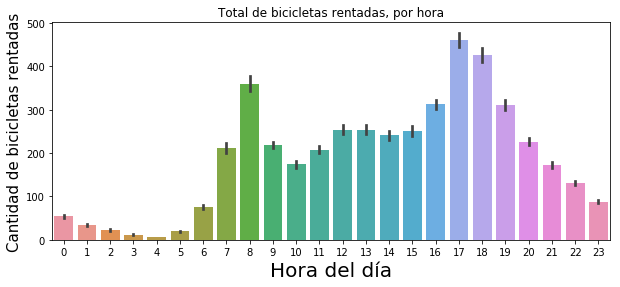

In [123]:
plt.figure(figsize=(10,4))
plt.title('Total de bicicletas rentadas, por hora')
sns.barplot(x=bikes_hour['hr'], y=bikes_hour['cnt'])
plt.ylabel('Cantidad de bicicletas rentadas', fontsize=15)
plt.xlabel('Hora del día', fontsize=20)

Para mostrar la relación entre la cantidad de bicicletas rentadas y los atributos cuantitativos, éstos se tiene que **desnormalizar**.

In [124]:
bikes_hour_copy = bikes_hour.copy()
bikes_hour_copy['temp'] = bikes_hour['temp'].apply(lambda t: 47*t - 8)
bikes_hour_copy['hum'] = bikes_hour['hum'].apply(lambda t: 100*t)
bikes_hour_copy['windspeed'] = bikes_hour['windspeed'].apply(lambda t: 67*t)

Text(0.5, 0, 'Temperatura')

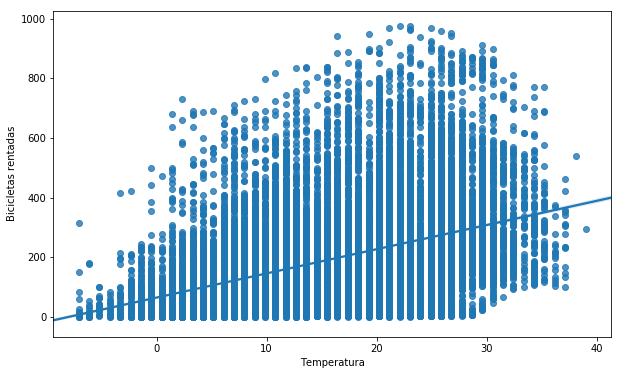

In [125]:
plt.figure(figsize=(10,6))
sns.regplot(x=bikes_hour_copy['temp'], y=bikes_hour_copy['cnt'])
plt.ylabel('Bicicletas rentadas')
plt.xlabel('Temperatura')

Text(0.5, 0, 'Humedad')

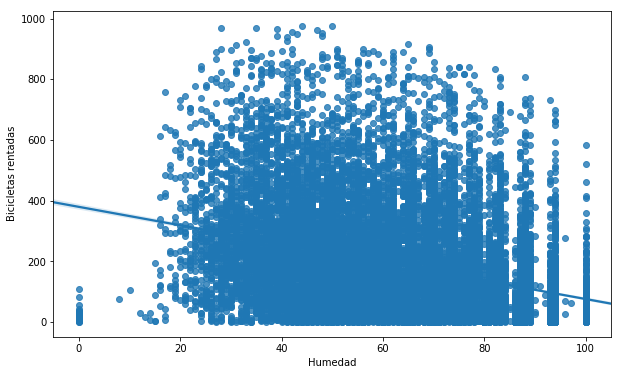

In [126]:
plt.figure(figsize=(10,6))
sns.regplot(x=bikes_hour_copy['hum'], y=bikes_hour_copy['cnt'])
plt.ylabel('Bicicletas rentadas')
plt.xlabel('Humedad')

Text(0.5, 0, 'Velocidad del viento')

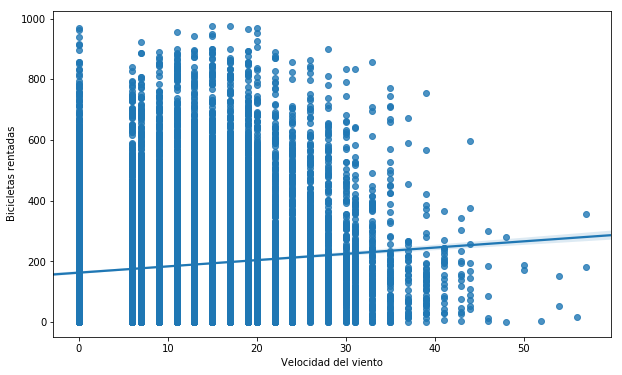

In [127]:
plt.figure(figsize=(10,6))
sns.regplot(x=bikes_hour_copy['windspeed'], y=bikes_hour_copy['cnt'])
plt.ylabel('Bicicletas rentadas')
plt.xlabel('Velocidad del viento')

Ahora se explora otro dataset que contiene información sobre los viajes que realizan los usuarios del servicio de renta de bicicletas.

In [128]:
trip_data = pd.read_csv("201909-capitalbikeshare-tripdata.csv")
print("Dimensiones del dataset trip_data:", trip_data.shape)
new_dt.head()

Dimensiones del dataset trip_data: (360225, 9)


,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,207,2019-09-01 00:00:27,2019-09-01 00:03:54,31246,M St & Pennsylvania Ave NW,31128,23rd & M St NW,W21128,Member
1,726,2019-09-01 00:00:46,2019-09-01 00:12:52,31124,14th & Irving St NW,31116,California St & Florida Ave NW,W01208,Member
2,4401,2019-09-01 00:00:48,2019-09-01 01:14:10,31129,15th St & Pennsylvania Ave NW,31277,17th & G St NW,W23690,Casual
3,388,2019-09-01 00:01:01,2019-09-01 00:07:30,31648,Potomac Ave & Half St SW,31609,Maine Ave & 7th St SW,W20449,Member
4,537,2019-09-01 00:01:09,2019-09-01 00:10:07,31200,Massachusetts Ave & Dupont Circle NW,31229,New Hampshire Ave & T St NW,W20206,Member
